In [1]:
import networkx as nx
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import random
import collections
from collections import defaultdict
import matplotlib.pyplot as plt 

In [2]:
#df = pd.read_csv('valuesAdjList.csv')
df = pd.read_csv('data/valuesMatrix.csv')
# df.columns
# df.head(10)
nameDict = df['name']
nameDict[0]
df = df.drop('name',axis=1)
# # range of lvls 1-5
#df[df['lvl'] < 5] -= 1
#df.rename(columns={'lvl': 'node'}, inplace=True)
newColBase = df['lvl'].to_numpy()
newCol = [[idx,x] for idx, x in enumerate(newColBase)]
newColInvert = [[x,idx] for idx, x in enumerate(newColBase)]

df['edges'] = newCol
df['invertedEdges'] = newColInvert
df['name'] = nameDict
df.head(10)

,lvl,edges,invertedEdges,name
0,1,"[0, 1]","[1, 0]",none
1,2,"[1, 2]","[2, 1]",little
2,3,"[2, 3]","[3, 2]",some
3,4,"[3, 4]","[4, 3]",more
4,5,"[4, 5]","[5, 4]",all
5,2,"[5, 2]","[2, 5]",ACCEPTANCE
6,3,"[6, 3]","[3, 6]",ACHIEVEMENT
7,4,"[7, 4]","[4, 7]",ADVENTURE
8,4,"[8, 4]","[4, 8]",ART
9,4,"[9, 4]","[4, 9]",ATTRACTIVENESS


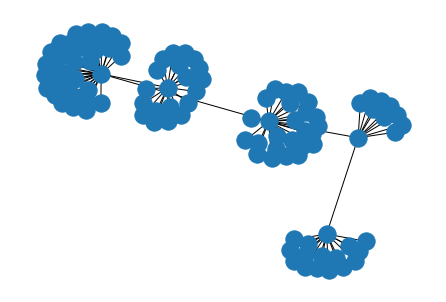

In [3]:
def bipartite(u,v,edges):
    bi = nx.Graph()
    bi.add_nodes_from(u, bipartite=0)
    bi.add_nodes_from(v, bipartite=1)
    bi.add_edges_from(edges)
    return bi


edges = df['edges'].to_list()
edges[4][1] = 4

invertedEdges = df['invertedEdges']
invertedEdges[4][1] = 4

for idx, value in enumerate(edges):
    
    if idx >= 4:
        edges[idx][0] += 1
        invertedEdges[idx][0] += 1
    
        
   
        
# # scale
u = [x for x in range(4)]
v = [x for x in range(4,len(edges)-1)]

biGraph = bipartite(u,v,edges)
nx.draw(biGraph)

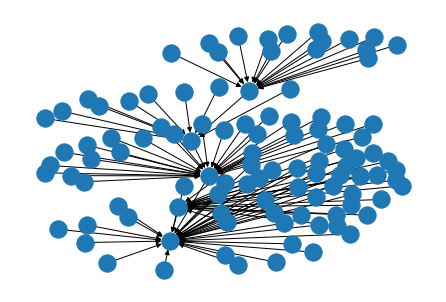

In [4]:
# create graphs
G1 = nx.MultiDiGraph()
G1.add_edges_from(edges)
#adjList = nx.adjacency_matrix(G1)
nx.draw(G1)

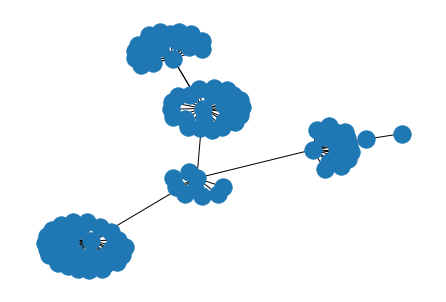

In [5]:
G2 = nx.MultiGraph()
G2.add_edges_from(invertedEdges)
#adjList2 = nx.adjacency_matrix(G1)
nx.draw(G2)

In [6]:
# connect duality of emotion. 
# e.g., hope/fear
# use 8 from Budhism
df['io'] = [[] for _ in range(len(df))]
df.head(10)

,lvl,edges,invertedEdges,name,io
0,1,"[0, 1]","[1, 0]",none,[]
1,2,"[1, 2]","[2, 1]",little,[]
2,3,"[2, 3]","[3, 2]",some,[]
3,4,"[3, 4]","[4, 3]",more,[]
4,5,"[5, 4]","[6, 4]",all,[]
5,2,"[6, 2]","[3, 5]",ACCEPTANCE,[]
6,3,"[7, 3]","[4, 6]",ACHIEVEMENT,[]
7,4,"[8, 4]","[5, 7]",ADVENTURE,[]
8,4,"[9, 4]","[5, 8]",ART,[]
9,4,"[10, 4]","[5, 9]",ATTRACTIVENESS,[]


In [7]:
# G2 = nx.DiGraph(adjDictValue)
# G2.remove_edges_from(nx.selfloop_edges(G2))
# nx.draw(G2, with_labels=False)
#adjDictValue[0]

In [8]:
eightEmotionSet = list((-x,x) for x in range(0,8))
eightEmotionSet
df['io'] = [ random.sample(eightEmotionSet, 1)[0] for _ in df.index ]
df.head(10)

,lvl,edges,invertedEdges,name,io
0,1,"[0, 1]","[1, 0]",none,"(-6, 6)"
1,2,"[1, 2]","[2, 1]",little,"(-3, 3)"
2,3,"[2, 3]","[3, 2]",some,"(-3, 3)"
3,4,"[3, 4]","[4, 3]",more,"(-1, 1)"
4,5,"[5, 4]","[6, 4]",all,"(-2, 2)"
5,2,"[6, 2]","[3, 5]",ACCEPTANCE,"(0, 0)"
6,3,"[7, 3]","[4, 6]",ACHIEVEMENT,"(-4, 4)"
7,4,"[8, 4]","[5, 7]",ADVENTURE,"(-6, 6)"
8,4,"[9, 4]","[5, 8]",ART,"(0, 0)"
9,4,"[10, 4]","[5, 9]",ATTRACTIVENESS,"(0, 0)"


8


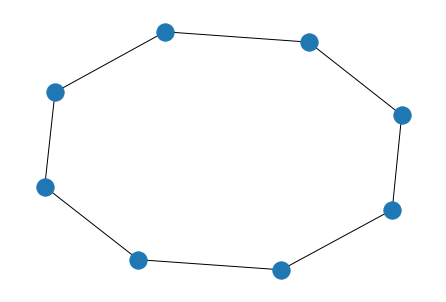

In [9]:
# eightEmotionSetConnected = [(-x,-x-1) for x in range(0,7) if x < 7]
# eightEmotionSetConnected.append((-7,0))
# print(len(eightEmotionSetConnected))

eightEmotionSetConnected = [(x,x+1) for x in range(0,7) if x < 7]
eightEmotionSetConnected.append((7,0))
print(len(eightEmotionSetConnected))



ioGraph = nx.Graph()
ioGraph.add_edges_from(eightEmotionSetConnected)
nx.draw(ioGraph)



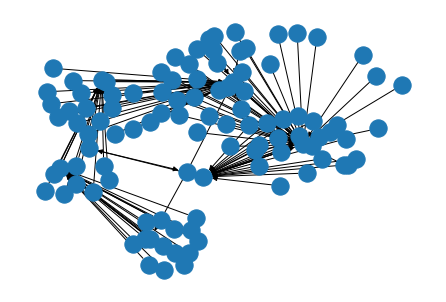

In [10]:
G1.add_edges_from(eightEmotionSetConnected)
nx.draw(G1)

In [11]:
eightEmotionSetConnected

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 0)]

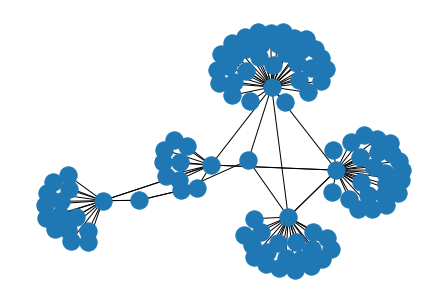

In [12]:
G2.add_edges_from(eightEmotionSetConnected)
nx.draw(G2)

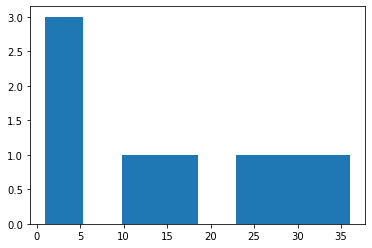

In [13]:
x = nx.average_degree_connectivity(G2)
plt.hist(x, bins=(len(x)))
plt.show()


269.128
1000


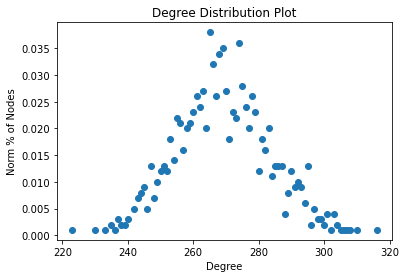

In [14]:
G3 = nx.binomial_graph(1000,0.27)

L = G3.number_of_edges()
N = G3.number_of_nodes()
sigmaK = 2*L / N
print(sigmaK)
print(N)



def pnGraph(G):
    degrees = sorted([G.degree(n) for n in G.nodes()])
    degreesCount = collections.Counter(degrees)
    in_deg, in_cnt = zip(*degreesCount.items())
    # normalize against max element
    #n = max(in_cnt)
    # normalize against sum, e.g., range 0-1
    n = sum(in_cnt)
    norm = [float(i)/n for i in in_cnt]
    plt.title("Degree Distribution Plot")
    plt.xlabel('Degree')
    plt.ylabel('Norm % of Nodes')
    plt.plot(in_deg, norm,'o')
    plt.show()


pnGraph(G3)




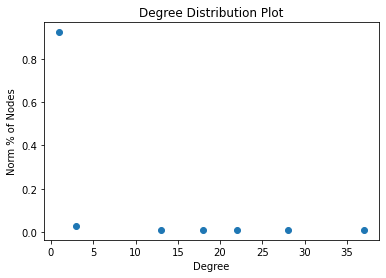

In [18]:
pnGraph(G1)

In [20]:
#Clustering Coefficient
c = nx.clustering(G3)
print(c)

{0: 0.2731820287169986, 1: 0.26801029159519724, 2: 0.26858481097356973, 3: 0.2723181843591034, 4: 0.2694269589754721, 5: 0.2683701098627494, 6: 0.2721303501945525, 7: 0.27153284671532846, 8: 0.26964235063562053, 9: 0.27162933684672813, 10: 0.26630391506303913, 11: 0.2723723964599877, 12: 0.26811081638667844, 13: 0.2676140284835937, 14: 0.26815341521223873, 15: 0.2742953431372549, 16: 0.26796315818676136, 17: 0.2708693441789527, 18: 0.2677310767216794, 19: 0.26632739609838846, 20: 0.271264367816092, 21: 0.26806639239608454, 22: 0.265625, 23: 0.2692716194309352, 24: 0.27094856363149045, 25: 0.27076670766707667, 26: 0.26995460679671207, 27: 0.26807843527596675, 28: 0.2670355731225296, 29: 0.27107419712070874, 30: 0.27000476154675085, 31: 0.27148334711675814, 32: 0.26468227424749163, 33: 0.26743502677288755, 34: 0.2639182225225986, 35: 0.26866930171278, 36: 0.26860547595403605, 37: 0.2732429506190274, 38: 0.2685049019607843, 39: 0.2699248340206487, 40: 0.26866346936928787, 41: 0.2698103132

[0, 96, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]


Text(0, 0.5, 'Frequency')

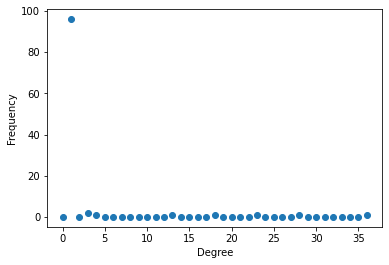

In [16]:

degree_freq = nx.degree_histogram(G2)
print(degree_freq)
degrees = range(len(degree_freq))
#plt.figure(figsize=(12, 8)) 
plt.scatter(x=degrees,y=degree_freq)
plt.xlabel('Degree')
plt.ylabel('Frequency')

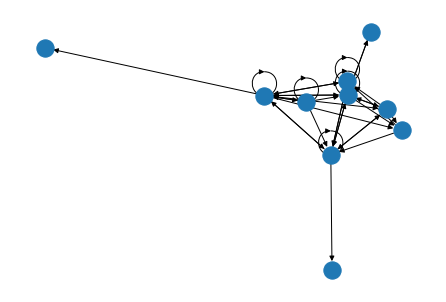

In [17]:
# passing in normally distributed training samples
# S = [ (0,value 0), (1,value1), (0.5, value1), ... Nth]
# S`= [value 0`, value 1`]

z = np.random.normal(loc=0, scale=2, size=(100)).tolist()
y = np.random.normal(loc=0, scale=2, size=(100)).tolist()

zy = [(int(i),int(j) )for i,j in zip(z,y)]
# sns.distplot(z)
# sns.distplot(y)
# sns.distplot(zy)
G = nx.DiGraph()
G.add_edges_from(zy)
nx.draw(G)

def feel_baseLayer(data:list, layer:object) -> object:
    # python >= 3.9 = layer | data
    # newCol = df['lvl'].to_numpy()
    # newCol = [[x] for x in newCol]
    # df['lvl'] = newCol
    
    updated_layer = {**layer, **data} 
    return updated_layer